In [5]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Loading from URL to Pandas Dataframe.

# dataset URL
URL = 'https://raw.githubusercontent.com/labdhigandhi/FlightDelays/main/transfusion.data'

# Read dataset to pandas dataframe.
dataset = pd.read_csv(URL)

# verify loaded dataset
print('\nLoaded dataset in Pandas Dataframe:\n')
dataset.info()

print('Sample entries in dataset')
# first 5 entries
dataset.head(n=5)


Loaded dataset in Pandas Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
Sample entries in dataset


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
# dataset statistics 
def classwise_means(df):
    """Prints classwise averages for attributes present in the dataset (df)."""
    print('Classes in dataset: ')
    class_labels = df['whether he/she donated blood in March 2007'].unique()
    print(class_labels)
    print('\n')
    print('Class-wise Attribute Averages')
    print(df.groupby(['whether he/she donated blood in March 2007']).mean())

classwise_means(dataset)

Classes in dataset: 
[1 0]


Class-wise Attribute Averages
                                            Recency (months)  ...  Time (months)
whether he/she donated blood in March 2007                    ...               
0                                                  10.771930  ...      34.770175
1                                                   5.455056  ...      32.719101

[2 rows x 4 columns]


In [8]:
# Split data into Features, Labels

# first 4 columns correspond to features, 5th column contains the class labels
X = dataset.iloc[:, :4].values
Y = dataset.iloc[:, 4].values

# Train-Test split

# Following an 80-20 split on data.
# That is, 598 examples would be used as the training set with known labels,
# and performance of the KNN algorithm will be tested on the remaining 150 unseen examples.

# The dataset is shuffled with 10 as the random seed for reproducible results.
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=10, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Number of train samples:  598
Number of test samples:  150


              precision    recall  f1-score   support

           0       0.81      0.98      0.89       115
           1       0.80      0.23      0.36        35

    accuracy                           0.81       150
   macro avg       0.80      0.61      0.62       150
weighted avg       0.81      0.81      0.76       150



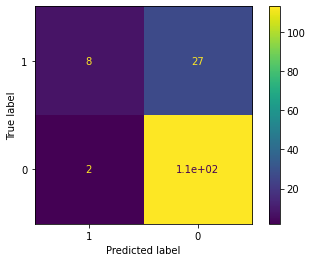

In [12]:
# Fit model to training data

# Refer: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification and
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

# Evaluate on test data 
y_pred = classifier.predict(X_test)

# Confusion Matrix
class_labels = dataset['whether he/she donated blood in March 2007'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

# Performance Statistics
print(classification_report(y_test, y_pred))

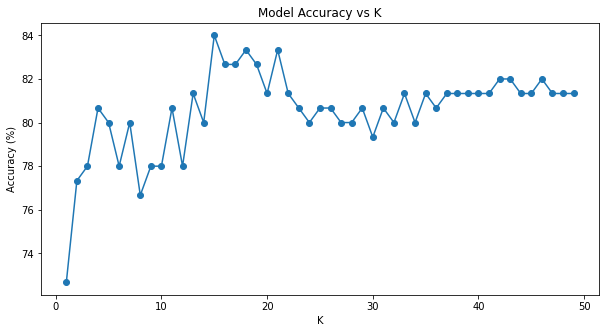

The model achieves 100% Test accuracy for K = []


In [13]:
#Effect of parameter 'K' (number of neighbours)
# line graph plot
def simple_line_plot(y_values, x_values, title, xtitle, ytitle):
    """Plots a lineplot for given data."""
    plt.figure(figsize=(10,5))
    plt.plot(x_values, y_values, marker='o')
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

# testing out performance of the KNN algorithm for different values of K
accuracies = []

K_vals = list(range(1, 50))

for k in K_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracies.append((1-np.mean(pred_i != y_test))*100)
    
simple_line_plot(accuracies, K_vals, 'Model Accuracy vs K', 
                'K', 'Accuracy (%)')

accuracies=np.array(accuracies)

print("The model achieves 100% Test accuracy for K =", list(np.where(accuracies==100)[0]))    